<a href="https://colab.research.google.com/github/VishhAAkha/MBTI-class--Virtual-Leader/blob/main/MBTI_Personality_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MBTI Personality Prediction Machine Learning Model**


---

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/content/LinkedinData.csv"
data_set = pd.read_csv(file_path, usecols=["Type", "About"])

# Display the first few rows
print(data_set.tail())


                                                 About  Type
922  Business Networking, Administration, Marketing...  INTP
923  With pleasure, we take this opportunity and in...  ISFP
924  Forward thinking and passionate sustainability...  INTJ
925  An accomplished Civil & Environmental Engineer...  INFP
926  A seasoned professional with a professional ex...  INFP


# Exploratory data analysis

The size of the dataset

In [ ]:
nRow, nCol = data_set.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 927 rows and 2 columns


Dataset Information

In [ ]:
data_set.dtypes

,0
About,object
Type,object


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   About   927 non-null    object
 1   Type    927 non-null    object
dtypes: object(2)
memory usage: 14.6+ KB




*   There are only 2 columns in the dataset
*   Total no. of rows are 8675
*   There are no null values present in the dataset
*   One Disadvantage is that all values are textual, hence they have to be converted to numerical form to train the ML model

In [ ]:
data_set.describe(include=['object'])

,About,Type
count,927,927
unique,926,16
top,.,INFJ
freq,2,113




*   There are 16 unique personality type indicators in the dataset
*   INFJ is the most frequently occuring personality type in our dataset

*   Lastly, there are no repeating About in the dataset

Now we finding the unique values from the 'type' of personality column

In [ ]:
types = np.unique(np.array(data_set['Type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
total = data_set.groupby(['Type']).count()
total

,About
Type,
ENFJ,15
ENFP,54
ENTJ,36
ENTP,58
ESFJ,18
ESFP,73
ESTJ,35
ESTP,77
INFJ,113


Data visualization for no. of About for each personality type

In [ ]:
total = data_set.groupby(['Type']).count()*50
total

,About
Type,
ENFJ,750
ENFP,2700
ENTJ,1800
ENTP,2900
ESFJ,900
ESFP,3650
ESTJ,1750
ESTP,3850
INFJ,5650


Text(0.5, 1.0, 'Total Linkedin bios for each personality type')

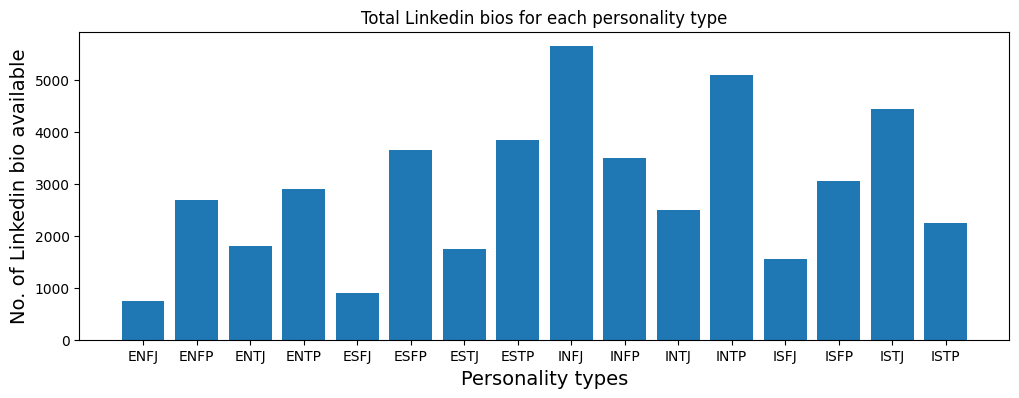

In [ ]:
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['About'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of Linkedin bio available', size = 14)
plt.title('Total Linkedin bios for each personality type')

In [ ]:
#Finding the most common words in all Linkedin About.
words = list(df["About"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('and', 5203),
 ('of', 3130),
 ('in', 2777),
 ('the', 2637),
 ('to', 2068),
 ('a', 1815),
 ('for', 1316),
 ('with', 1243),
 ('&', 1074),
 ('I', 1035),
 ('on', 637),
 ('is', 632),
 ('as', 577),
 ('from', 437),
 ('at', 434),
 ('have', 418),
 ('waste', 400),
 ('experience', 394),
 ('my', 384),
 ('water', 354),
 ('-', 343),
 ('has', 342),
 ('that', 342),
 ('by', 332),
 ('years', 328),
 ('Water', 321),
 ('Environmental', 307),
 ('business', 304),
 ('our', 297),
 ('•', 295),
 ('an', 293),
 ('am', 293),
 ('environmental', 287),
 ('management', 279),
 ('Management', 265),
 ('also', 249),
 ('are', 249),
 ('working', 243),
 ('India', 223),
 ('We', 222)]

Now we see the Wordclouds for each Personality Type. We produced 16 Word Clouds for 16 groups of personality. These word clouds are generated such that the size of each word is proportional to its appearance frequency in the top Linkedin About column . We consider these word clouds to be illustrative of some of the unique ways that different MBTIs use language.

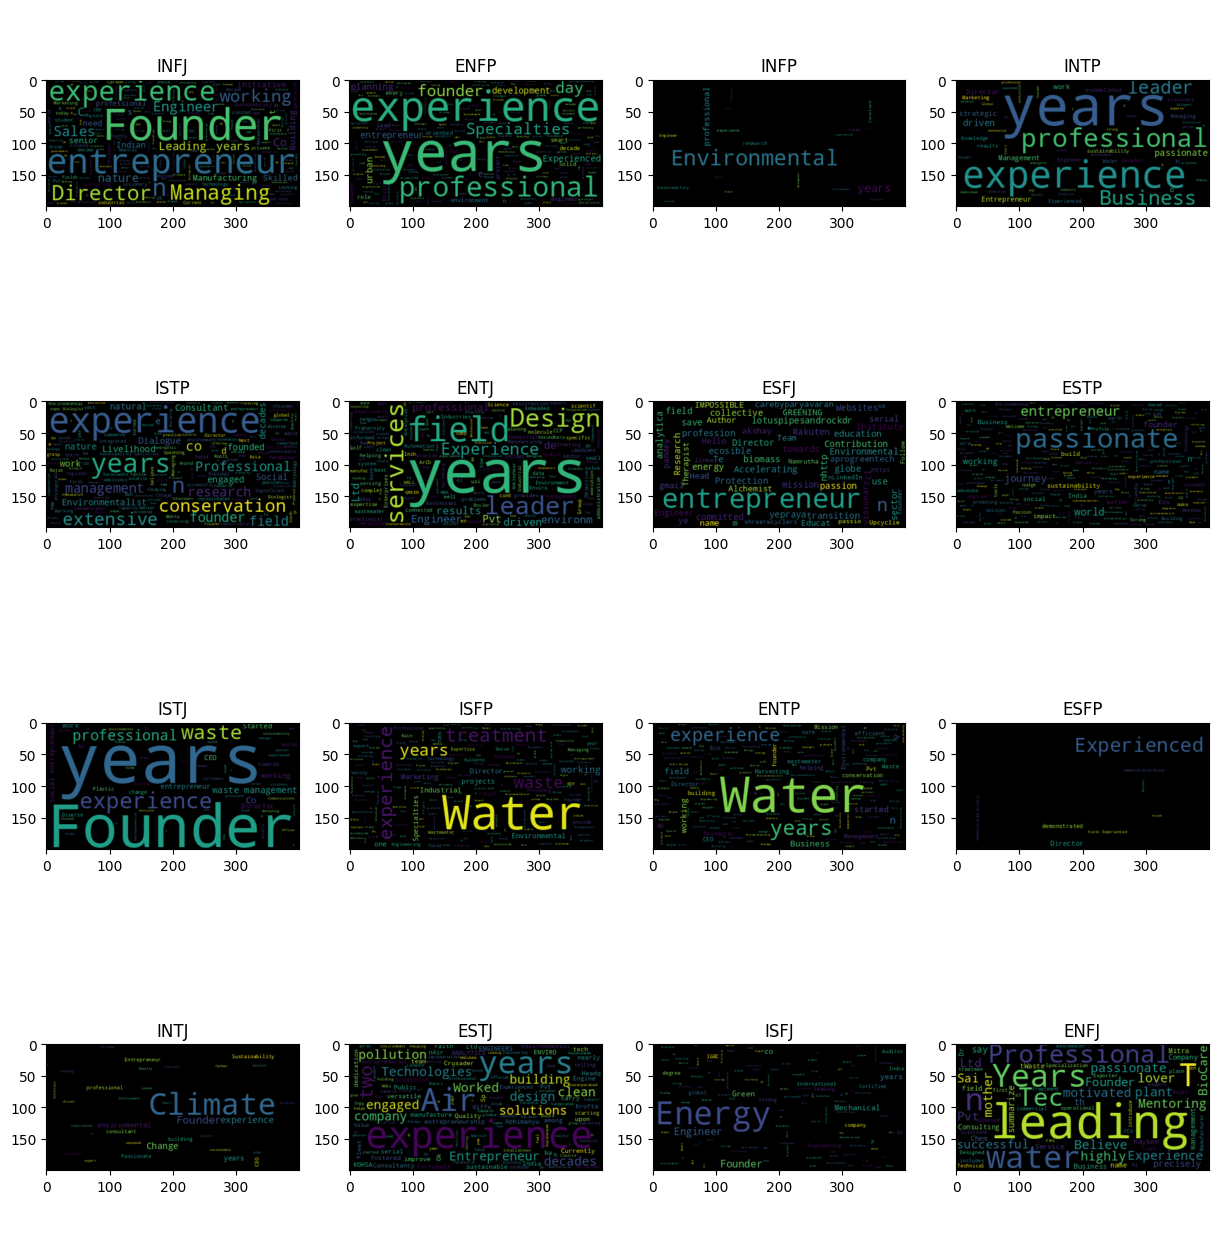

In [ ]:
fig, ax = plt.subplots(len(df['Type'].unique()), sharex=True, figsize=(15,len(df['Type'].unique())))
k = 0
for i in df['Type'].unique():
    df_4 = df[df['Type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['About'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

# Pre-Processing Stage


In [ ]:
def preprocess_text(df, remove_special=True):
    texts = df['About'].copy()
    labels = df['Type'].copy()

    #Remove links
    df["About"] = df["About"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

    #Keep the End Of Sentence characters
    df["About"] = df["About"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["About"] = df["About"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["About"] = df["About"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))

    #Strip Punctation
    df["About"] = df["About"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["About"] = df["About"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["About"] = df["About"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert About to lowercase
    df["About"] = df["About"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["About"] = df["About"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))

    #Remove very short or long words
    df["About"] = df["About"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x))
    df["About"] = df["About"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove MBTI Personality Words - crutial in order to get valid model accuracy estimation for unseen data.
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    return df

#Preprocessing of entered Text
new_df = preprocess_text(data_set)

In [ ]:
#Remove About(bios) with less than X words
min_words = 15
print("Before : Number of About of linkedin", len(new_df))
new_df["no. of. words"] = new_df["About"].apply(lambda x: len(re.findall(r'\w+', x)))
new_df = new_df[new_df["no. of. words"] >= min_words]

print("After : Number of Bios", len(new_df))

Before : Number of About of linkedin 801
After : Number of posts 801


# Feature Engineering

In [ ]:
new_df.head()

,About,Type,no. of. words
0,working area related cancer vaccines complim...,INFJ,21
1,medical sciences professional with nearly ye...,ENFP,58
2,interests\n eostokendot novel antiviral thera...,INFP,22
3,competent diligent personnel administratio...,INTP,38
4,experienced research scientist with several ye...,INFP,25


## Splitting into X and Y feature

**1.  LabelEncoder** : Provided by Sklearn library that converts the the levels of categorical features (labels) into numeric form so as to convert it into the machine-readable form. It encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [ ]:
# Converting MBTI personality (or target or Y feature) into numerical form using Label Encoding
# encoding personality type
enc = LabelEncoder()
new_df['type of encoding'] = enc.fit_transform(new_df['Type'])

target = new_df['type of encoding']

In [ ]:
new_df.head(15)

,type,posts,no. of. words,type of encoding
0,INFJ,enfp intj moments sportscenter plays...,430,8
1,ENTP,finding lack these posts very alarming eo...,803,3
2,INTP,good course which know thats bles...,253,11
3,INTJ,dear intp enjoyed conversation other eos...,777,10
4,ENTJ,youre fired eostokendot thats another silly...,402,2
5,INTJ,eostokendot science perfect eostokendo...,245,10
6,INFJ,cant draw nails haha eostokendot those w...,970,8
7,INTJ,tend build collection things desktop th...,140,10
8,INFJ,sure thats good question eostokendot dist...,522,8
9,INTP,this position where have actually pe...,130,11




*   We choose label encoding over one-hot encoding to reduce the pre-processing time, and majority due to the fact that there are predefined 16 values under MBTI and assigning unique integer based on alphabetical ordering seems like a viable option
*   It seems like a better option to the curse of dimensionality in the feature space.

In natural language processing, useless words are referred to as **stop words**.

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# The python natural language toolkit library provides a list of english stop words.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '



*   We observe that almost all of these were were the most occuring words in our wordcloud above

**2.  CountVectorizer** is used to convert a collection of text documents to a vector of term/token counts and build a vocabulary of known words, but also to encode new documents using that vocabulary. It also enables the pre-processing of text data prior to generating the vector representation.

Here, we use **stop_words='english'** with CountVectorizer since this just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. This is an important step in pre-processing as our model can often be improved if you don’t take those words into account.

In [ ]:
# Vectorizing the bios for the model and filtering Stop-words
vect = CountVectorizer(stop_words='english')

# Converting bios (or training or X feature) into numerical form by count vectorization
train =  vect.fit_transform(new_df["About"])

In [ ]:
train.shape

(801, 9473)



*   So now there are 9473 features in our dataset for 801  rows (users)

---
Now we train the model in multiple ML algorithms namely: Random Forest, XGBoost, Gradient Descent, Support Vector Machine,  in order to choose the classifier which shows the best accuracy results.

Additionaly, we split the dataset into testing and training in multiple ratios to find out which gives the best results.

# Training & Evaluating : 80-20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(640, 9473) (640,) (161, 9473) (161,)


**Note:** Algorithms below can be quite time consuming

In [ ]:
accuracies = {}

#Gradient Descent
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Gradient Descent'] = accuracy* 100.0
print(Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.67%


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.26%


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

Y_pred = svm.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['SVM'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.66%


## Comparing Algorithms

In [ ]:
pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])

,Accuracies(%)
Gradient Descent,72.670807
Logistic Regression,78.260870
SVM,54.658385


We can clearly see that this model overfits out dataset when we apply split ratio of 80:20 on our dataset.(almost all the results are near 50%, which is not good)

# Training & Evaluating : 70-30 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(536, 9473) (536,) (265, 9473) (265,)


In [ ]:
#Gradient Descent
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Gradient Descent'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.55%


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.47%


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

Y_pred = svm.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['SVM'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.92%


## Comparing Algorithms

In [ ]:
pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])

,Accuracies(%)
Gradient Descent,67.547170
Logistic Regression,75.471698
SVM,47.924528


# Four Classifiers across MBTI axis

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/content/LinkedinData.csv"  # Replace with your actual file path
data = pd.read_csv(file_path, usecols=["Type", "About"])

# Display the first few rows
print(data.tail())

                                                 About  Type
922  Business Networking, Administration, Marketing...  INTP
923  With pleasure, we take this opportunity and in...  ISFP
924  Forward thinking and passionate sustainability...  INTJ
925  An accomplished Civil & Environmental Engineer...  INFP
926  A seasoned professional with a professional ex...  INFP


Now we add columns for personality type indicators

In [ ]:
def get_types(row):
    t=row['Type']

    I = 0; N = 0
    T = 0; J = 0

    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found')

    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')

    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')

    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J })

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,About,Type,IE,NS,TF,JP
0,"Working is area related to Cancer Vaccines, Co...",INFJ,1,1,0,1
1,A medical sciences professional with nearly 14...,ENFP,0,1,0,0
2,INTERESTS:\n1. Novel Antiviral therapeutic and...,INFP,1,1,0,0
3,Competent & diligent HR & Personnel Administr...,INTP,1,1,1,0
4,Experienced Research Scientist with several ye...,INFP,1,1,0,0


**Counting** No. of bios in one class / Total no. of bios in the other class

In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 366  /  561
Intuition (N) / Sensing (S):		 429  /  498
Thinking (T) / Feeling (F):		 435  /  492
Judging (J) / Perceiving (P):		 540  /  387


## Pre-Processing Stage

We preprocess the Linkedin About by using Lemmitization technique. **Lemmatization** is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words, hence we use this instead in our model. So it links words with similar meaning to one word.

In [ ]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed
useless_words = stopwords.words("english")

# Remove these from the bios
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Or we can use Label Encoding (as above) of this unique personality type indicator list
# from sklearn.preprocessing import LabelEncoder
# unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
#        'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
# lab_encoder = LabelEncoder().fit(unique_type_list)

Binarizing the each personality type feature

In [ ]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.Type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 0 1]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]]


Cleaning of data in the Linkedin About

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_About = []
  len_data = len(data)
  i=0

  for row in data.iterrows():
      # check code working
      # i+=1
      # if (i % 500 == 0 or i == 1 or i == len_data):
      #     print("%s of %s rows" % (i, len_data))

      #Remove and clean comments
      About= row[1].About

      #Remove url links
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', About)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

      #Remove MBTI personality words from About
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].Type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_About.append(temp)

  # returns the result
  list_About = np.array(list_About)
  list_personality = np.array(list_personality)
  return list_About, list_personality

list_About, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nAbout before preprocessing:\n\n", data.About[0])
print("\nAbout after preprocessing:\n\n", list_About[0])
print("\nMBTI before preprocessing:\n\n", data.Type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

Example :

Post before preprocessing:

 Working is area related to Cancer Vaccines, Complimentary Alternative Medicine, Holistic Approaches to Cancer, Cancer Vaccines, Bio-Pharma, Tissue Engineering using stem cells, 3D imprinting.

Post after preprocessing:

 working area related cancer vaccine complimentary alternative medicine holistic approach cancer cancer vaccine bio pharma tissue engineering using stem cell imprinting 

MBTI before preprocessing:

 INFJ

MBTI after preprocessing:

 [0 0 0 0]


In [ ]:
nRow, nCol = list_personality.shape
print(f'No. of linkedin About(Bios) = {nRow}  and No. of Personalities = {nCol} ')

No. of posts = 927  and No. of Personalities = 4 


## Feature Engineering

In [ ]:
# Vectorizing the database bios to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word",
                             max_features=1000,
                             max_df=0.7,
                             min_df=0.1)
# the feature should be made of word n-gram
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_About)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
#feature_names = list(enumerate(cntizer.get_feature_names()))
#print("10 feature names can be seen below")
#print(feature_names[0:10])

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out())) # Changed to get_feature_names_out()
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'across'), (1, 'also'), (2, 'area'), (3, 'building'), (4, 'business'), (5, 'change'), (6, 'client'), (7, 'climate'), (8, 'company'), (9, 'design')]

Using Tf-idf :
Now the dataset size is as below
(927, 70)


### Splitting into X and Y variable

Hence we split the features as :

X: User About in TF-IDF representation

Y: Personality type in Binarized MBTI form

In [ ]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)",
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


Let's see how the bios look in TF-IDF representation: (we have taken 1st About for demonstration)

In [ ]:
print("X: 1st bios in tf-idf representation\n%s" % X_tfidf[0])

X: 1st posts in tf-idf representation
[0.         0.         0.66260723 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.57086591 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.48483376 0.         0.        ]


Let's see how the bios look in Binarized MBTI personality indicator representation: (we have taken 1st linkedin bio for demonstration)

In [ ]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])

For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


Therefore we have successfully converted the textual data into numerical form

## Training & Evaluating Models

In [ ]:
# bios in tf-idf representation
X = X_tfidf

In [ ]:
#XGBoost model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 76.14%
NS: Intuition (N) / Sensing (S) Accuracy: 75.16%
FT: Feeling (F) / Thinking (T) Accuracy: 78.76%
JP: Judging (J) / Perceiving (P) Accuracy: 77.12%


In [ ]:
# Stocastic Gradient Descent for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = SGDClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 76.47%
NS: Intuition (N) / Sensing (S) Accuracy: 72.55%
FT: Feeling (F) / Thinking (T) Accuracy: 74.51%
JP: Judging (J) / Perceiving (P) Accuracy: 77.78%


In [ ]:
# Logistic Regression for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 74.84%
NS: Intuition (N) / Sensing (S) Accuracy: 75.16%
FT: Feeling (F) / Thinking (T) Accuracy: 78.10%
JP: Judging (J) / Perceiving (P) Accuracy: 77.45%


In [ ]:
# SVM model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = SVC(random_state = 1)
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 76.80%
NS: Intuition (N) / Sensing (S) Accuracy: 76.47%
FT: Feeling (F) / Thinking (T) Accuracy: 80.39%
JP: Judging (J) / Perceiving (P) Accuracy: 79.08%
